# Uso de Hierarchical Clustering

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn import datasets, cluster

In [14]:
wine = datasets.load_wine()

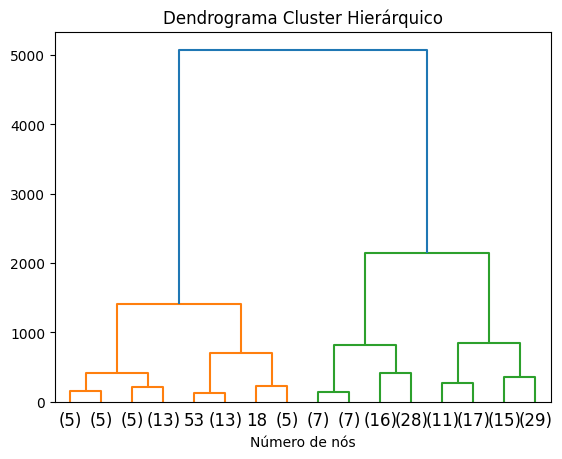

In [18]:
def graph_dendrogram(model, **kwargs):
    count = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += count[child_idx - n_samples]
        count[i] = current_count
    linkage_matrix = np.column_stack(
        [
            model.children_,
            model.distances_,
            count
        ]
    ).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)

x = wine.data


model = cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model_fit = model.fit(x)

plt.title("Dendrograma Cluster Hierárquico")
graph_dendrogram(model_fit, truncate_mode="level", p=3)
plt.xlabel("Número de nós")
plt.show()  